In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# help from https://medium.com/analytics-vidhya/step-by-step-train-model-using-tensorflow-cnn-2f243b847c8

In [2]:
import os

from typing import Dict, List

labels: Dict[str, List[str]] = {}

for entry in os.listdir("./spectrograms"):
    (label, idx) = entry.split("-")

    if label == '2':
        continue

    if labels.get(label) is None:
        labels[label] = [idx]
    else:
        labels[label].append(idx)

for (label, data) in labels.items():
    print(f"{label}: {len(data)}")

9: 1000
6: 374
0: 1000
7: 1000
1: 429
5: 1000
4: 1000
3: 1000
8: 929


In [2]:
%pip install opencv-python seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:

import cv2 as cv
import os

LABELS = [
    "air_conditioner",
    "car_horn",
    "children_playing",
    "dog_bark",
    "drilling",
    "engine_idling",
    "gun_shot",
    "jackhammer",
    "siren",
    "street_music"
]

IMG_WIDTH = 610
IMG_HEIGHT = 450

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 256

for (label, ids) in labels.items():
    for idx in ids:
        try:
            path = os.path.join("./spectrograms", f"{label}-{idx}")
            img_array = cv.imread(path)
            new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(int(label))

        except Exception as e:
            print(e)
            pass

print(f"{LABELS[int(label)]}: {len(idx)}")


siren: 8


In [4]:
import numpy as np
X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,3)
Y_TRAIN = np.array(Y_TRAIN)
X_TRAIN = X_TRAIN/255

print(len(X_TRAIN))

7732


In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras import utils, models, layers

model = models.Sequential([
    # 1st Convolution layer with 32 filters.
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=X_TRAIN.shape[1:]),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 2nd Convolution layer with 64 filters
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 3rd Convolution layer with 64 filters
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Classifier layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model.summary()

2025-04-21 19:22:26.688211: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 19:22:26.697577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745259746.707922  122807 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745259746.710918  122807 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745259746.719244  122807 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,699,498 (128.55 MB)

 Trainable params: 33,699,498 (128.55 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
import tensorflow as tf

2025-04-21 19:49:51.221862: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-21 19:49:51.377733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745261391.426167  133709 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745261391.440051  133709 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745261391.578828  133709 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [11]:

Y_TRAIN = tf.keras.utils.to_categorical(Y_TRAIN, num_classes=10)

model.fit(X_TRAIN,Y_TRAIN, epochs=7, validation_split=0.3)

Epoch 1/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.2641 - loss: 2.0383 - val_accuracy: 0.0888 - val_loss: 16.1370
Epoch 2/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5938 - loss: 1.0874 - val_accuracy: 0.1103 - val_loss: 9.5357
Epoch 3/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7470 - loss: 0.7002 - val_accuracy: 0.1026 - val_loss: 15.1106
Epoch 4/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.8460 - loss: 0.4592 - val_accuracy: 0.1194 - val_loss: 14.0523
Epoch 5/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.8788 - loss: 0.3568 - val_accuracy: 0.1267 - val_loss: 20.7049
Epoch 6/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9225 - loss: 0.2446 - val_accuracy: 0.1172 - val_loss: 12.8152
Epoch 7/7
170/170 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9420 - loss: 0.1709 - val_accuracy: 0.1345 - val_loss: 21.1271


In [12]:
model.save("cnn3.keras")

In [8]:
model = tf.keras.models.load_model('cnn3.keras')

2025-04-21 19:49:53.795375: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
element = 500

expected = Y_TRAIN[element]
prediction = model.predict(X_TRAIN[element].reshape(1, 256, 256, 3))
predicted_class = np.argmax(prediction, axis=1)

print(LABELS[predicted_class[0]], LABELS[expected])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
predicted_class = np.argmax(prediction, axis=1)

NameError: name 'prediction' is not defined

In [18]:
print(predicted_class)

[7]


In [13]:
print(Y_TRAIN[0])

class_id = 5
ix = np.where(Y_TRAIN == class_id)[0]
print(ix)

for class_zero_idx in ix:
    prediction = model.predict(X_TRAIN[class_zero_idx].reshape(1, 256, 256, 3))
    predicted_class = np.argmax(prediction, axis=1)

    print(f"predicted: {LABELS[predicted_class[0]]}, actual: {LABELS[class_id]}")
    # print(prediction)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[]


In [9]:
predictions = model.predict(X_TRAIN)


242/242 ━━━━━━━━━━━━━━━━━━━━ 53s 220ms/step


In [10]:
predicted_labels = np.argmax(predictions, axis=1)


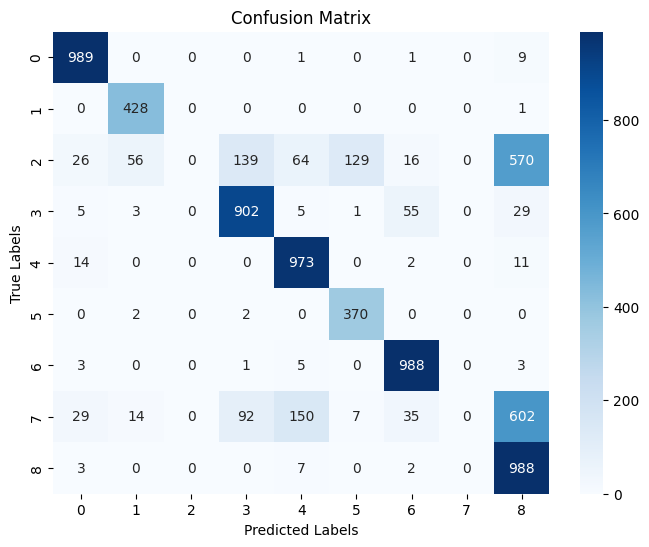

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = Y_TRAIN
# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()